In [1]:
import numpy

In [2]:
import tensorflow


In [3]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
pip install grpcio

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

In [8]:
X_train, X_test=X_train/255.0, X_test/255.0

In [9]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
print("categorical labels")
print(y_train[0:5])
y_train=tf.one_hot(y_train,10)
y_test=tf.one_hot(y_test,10)
print ("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [11]:
print(X_train.shape)
print(y_train.shape)
X_test.shape

(60000, 28, 28)
(60000, 10)


(10000, 28, 28)

In [12]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(50)
test_ds=tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(50)

In [13]:
from tensorflow.keras.layers import Flatten
flat=Flatten(dtype='float32')
print(X_train.shape)
print(flat(X_train).shape)

(60000, 28, 28)
(60000, 784)


In [14]:
W=tf.Variable(tf.zeros([784,10], tf.float32))
b=tf.Variable(tf.zeros([10], tf.float32))

In [15]:
def forward(x):
    return tf.matmul(x,W)+b

In [16]:
vector=[10, 0.2, 8]
softmax=tf.nn.softmax(vector)
print(softmax.numpy())
#verifying normalization
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print(tf.argmax(softmax).numpy())


[8.8075405e-01 4.8839214e-05 1.1919710e-01]
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
0


In [17]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [18]:
def model(x):
    x=flat(x)
    return activate(x)

In [19]:
def cross_entropy(y_label,y_pred):
    return (-tf.reduce_sum(y_label*tf.math.log(y_pred+1.e-10)))
cross_entropy(y_train,model(X_train)).numpy()
    

138155.12

In [20]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.25)

In [21]:
def train_step(x,y):
    with tf.GradientTape() as tape:
        current_loss=cross_entropy(y, model(x))
        grads=tape.gradient(current_loss, [W,b])
        optimizer.apply_gradients(zip(grads,[W,b]))
    return current_loss.numpy()
    

In [22]:
W=tf.Variable(tf.zeros([784,10],tf.float32))
b=tf.Variable(tf.zeros([10],tf.float32))
loss_values=[]
accuracies=[]
epochs=10
for i in range(epochs):
    j=0
    for X_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(X_train_batch, y_train_batch)
        if j%500==0:
            print("epoch", str(i), "batch", str(j),"loss: ",str(current_loss))
    current_loss=cross_entropy(y_train,model(X_train)).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(X_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    tf.equal(tf.argmax(model(X_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32)).numpy()
    accuracies.append(accuracy)
    print("End of epoch",str(i),"loss",str(current_loss),"accuracy",str(accuracy))
    

epoch 0 batch 500 loss:  231.75061
epoch 0 batch 1000 loss:  188.92615
End of epoch 0 loss 241968.47 accuracy 0.7991
epoch 1 batch 500 loss:  168.98343
epoch 1 batch 1000 loss:  185.70978
End of epoch 1 loss 217362.23 accuracy 0.82068336
epoch 2 batch 500 loss:  208.97937
epoch 2 batch 1000 loss:  211.79245
End of epoch 2 loss 212259.16 accuracy 0.82741666
epoch 3 batch 500 loss:  208.31625
epoch 3 batch 1000 loss:  181.04591
End of epoch 3 loss 209227.98 accuracy 0.83106667
epoch 4 batch 500 loss:  216.56789
epoch 4 batch 1000 loss:  209.17433
End of epoch 4 loss 216292.03 accuracy 0.8265333
epoch 5 batch 500 loss:  188.2135
epoch 5 batch 1000 loss:  188.9256
End of epoch 5 loss 210661.98 accuracy 0.83168334
epoch 6 batch 500 loss:  158.47755
epoch 6 batch 1000 loss:  202.94705
End of epoch 6 loss 201910.56 accuracy 0.8401
epoch 7 batch 500 loss:  174.36288
epoch 7 batch 1000 loss:  173.86089
End of epoch 7 loss 206299.4 accuracy 0.8356
epoch 8 batch 500 loss:  173.2903
epoch 8 batch 

In [23]:
correct_prediction_train= tf.equal(tf.argmax(model(X_train),axis=1),tf.argmax(y_train, axis=1))
accuracy_train=tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()
correct_prediction_test=tf.equal(tf.argmax(model(X_test),axis=1),tf.argmax(y_test,axis=1))
accuracy_test=tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()


In [24]:
print(accuracy_train)
print(accuracy_test)

0.83923334
0.833


Text(0, 0.5, 'loss')

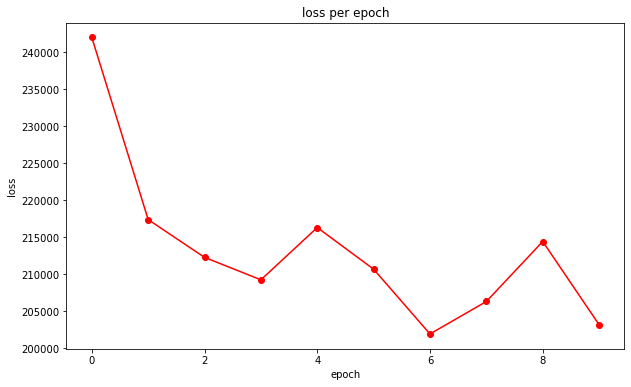

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'acc')

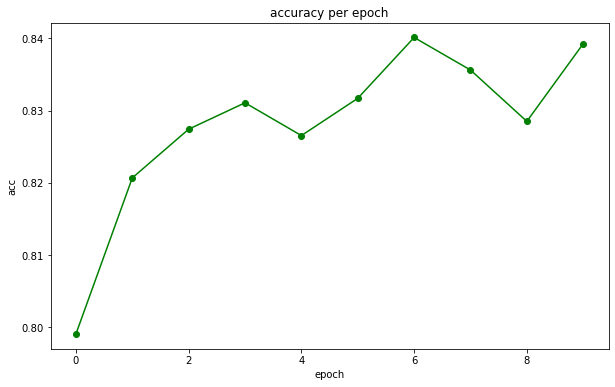

In [26]:
plt.plot(accuracies,'-go')
plt.title('accuracy per epoch')
plt.xlabel('epoch')
plt.ylabel('acc')

In [27]:
width=28
height=28
flat=width*height
class_output=10

In [28]:
X_img_train=tf.reshape(X_train, [-1,28,28,1])
X_img_train=tf.cast(X_img_train,'float32')
X_img_test=tf.reshape(X_test, [-1,28,28,1])
X_img_test=tf.cast(X_img_test,'float32')
train_ds2 = tf.data.Dataset.from_tensor_slices((X_img_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((X_img_test, y_test)).batch(50)

In [29]:
X_img_train=tf.slice(X_img_train,[0,0,0,0],[10000,28,28,1])
y_train=tf.slice(y_train,[0,0],[10000,10])

In [30]:
W_conv1=tf.Variable(tf.random.truncated_normal([5,5,1,32],stddev=0.1,seed=1))
b_conv1=tf.Variable(tf.constant(0.1,shape=[32]))

In [31]:
def convolve1(x):
    return (tf.nn.conv2d(x,W_conv1,strides=[1,1,1,1],padding='SAME')+b_conv1)

In [32]:
def h_conv1(x):
    return(tf.nn.relu(convolve1(x)))

In [33]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x),ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [34]:
W_conv2=tf.Variable(tf.random.truncated_normal([5,5,32,64],stddev=0.1,seed=2))
b_conv2=tf.Variable(tf.constant(0.1,shape=[64]))

In [35]:
def convolve2(x):
    return(tf.nn.conv2d(conv1(x), W_conv2,strides=[1,1,1,1], padding='SAME')+b_conv2)

In [36]:
def h_conv2(x):
    return(tf.nn.relu(convolve2(x)))

In [37]:
def conv2(x):
    return(tf.nn.max_pool(h_conv2(x),ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME'))

In [38]:
def layer2_matrix(x):
    return tf.reshape(conv2(x),[-1,7*7*64])

In [39]:
Wfc1=tf.Variable(tf.random.truncated_normal([7*7*64,1024], stddev=0.1,seed=3))
bfc1=tf.Variable(tf.constant(0.1,shape=[1024]))

In [40]:
def fc1(x): 
    return tf.matmul(layer2_matrix(x),Wfc1)+bfc1

In [41]:
def h_fc1(x):
    return tf.nn.relu(fc1(x))

In [42]:
keep_prob=0.5
def layer_drop(x):
    return tf.nn.dropout(h_fc1(x),keep_prob)

In [43]:
Wfc2=tf.Variable(tf.random.truncated_normal([1024,10], stddev=0.1,seed=3))
bfc2=tf.Variable(tf.constant(0.1,shape=[10]))

In [44]:
def fc(x): return tf.matmul(layer_drop(x),Wfc2)+bfc2

In [45]:
def y_CNN(x): return tf.nn.softmax(fc(x))

In [46]:
import numpy as np
layer4_test=[[0.9,0.1,0.1],[0.9,0.1,0.1]]
y_test=[[1.0,0.0,0.0],[1.0,0.0,0.0]]
np.mean(-np.sum(y_test*np.log(layer4_test),1))

0.10536051565782628

In [47]:
def cross_entropy(y_label,y_pred):
    return(-tf.reduce_sum(y_label*tf.math.log(y_pred+1.e-10)))

In [48]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [49]:
variables=[W_conv1,b_conv1,W_conv2,b_conv2,Wfc1,bfc1,Wfc2,bfc2,]
def train_step(x,y):
    with tf.GradientTape() as tape:
        current_loss=cross_entropy(y,y_CNN(x))
        grads=tape.gradient(current_loss, variables)
        optimizer.apply_gradients(zip(grads,variables))
        return  current_loss.numpy()

In [50]:
correct_prediction=tf.equal(tf.argmax(y_CNN(X_img_train),axis=1),tf.argmax(y_train,axis=1))

In [51]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float32'))

In [58]:
loss_values=[]
accuracies=[]
epochs=2
for i in range(epochs):
    j=0
    i+=1
    for X_train_batch,y_train_batch in train_ds2:
        j+=1
        current_loss=train_step(X_train_batch,y_train_batch)
        if j%50==0:
            correct_prediction=tf.equal(tf.argmax(y_CNN(X_train_batch),axis=1),
                                       tf.argmax(y_train_batch,axis=1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch",str(i),"batch",str(j),"loss: ", str(current_loss),"accuracy",str(accuracy))
    current_loss=cross_entropy(y_train,y_CNN(X_img_train)).numpy()
    loss_values.append(current_loss)
    correct_prediction=tf.equal(tf.argmax(y_CNN(X_img_train),axis=1),
                               tf.argmax(y_train,axis=1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch",str(i),"loss:", str(current_loss),"accuracy:", str(accuracy))

epoch 1 batch 50 loss:  1.3112416 accuracy 1.0
epoch 1 batch 100 loss:  7.850341 accuracy 0.98
epoch 1 batch 150 loss:  1.7327166 accuracy 0.96
epoch 1 batch 200 loss:  0.17756103 accuracy 1.0
epoch 1 batch 250 loss:  4.8822556 accuracy 0.98
epoch 1 batch 300 loss:  2.2162538 accuracy 0.98
epoch 1 batch 350 loss:  2.3918316 accuracy 0.98
epoch 1 batch 400 loss:  1.5027008 accuracy 1.0
epoch 1 batch 450 loss:  3.5203223 accuracy 0.98
epoch 1 batch 500 loss:  0.29665446 accuracy 1.0
epoch 1 batch 550 loss:  5.200161 accuracy 0.98
epoch 1 batch 600 loss:  5.0497293 accuracy 1.0
epoch 1 batch 650 loss:  5.8354735 accuracy 1.0
epoch 1 batch 700 loss:  5.1563597 accuracy 0.98
epoch 1 batch 750 loss:  8.380575 accuracy 0.98
epoch 1 batch 800 loss:  1.1323577 accuracy 1.0
epoch 1 batch 850 loss:  0.66411763 accuracy 1.0
epoch 1 batch 900 loss:  1.9827566 accuracy 1.0
epoch 1 batch 950 loss:  7.6666775 accuracy 0.96
epoch 1 batch 1000 loss:  2.1012607 accuracy 0.98
epoch 1 batch 1050 loss:  0.6

In [67]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for X_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(X_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))

batch 100 accuracy 1.0
batch 200 accuracy 1.0
batch 300 accuracy 0.98
batch 400 accuracy 1.0
batch 500 accuracy 1.0
batch 600 accuracy 0.98
batch 700 accuracy 1.0
batch 800 accuracy 1.0
batch 900 accuracy 0.96
batch 1000 accuracy 1.0
batch 1100 accuracy 0.98
batch 1200 accuracy 1.0
accuracy of entire set 0.9862667
